In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [60]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')
y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

Results of lasso selection in code below!

In [84]:
# # cols to remove from datasets
# cols_lasso = ['banner_views_old', 'days_elapsed_old', 'X3', 'marital_divorced', 'job_entrepreneur', 'job_freelance',
#              'job_housekeeper', 'job_technology', 'job_unemployed']
# # how to remove them:
# X_train = X_train.drop(columns=cols_lasso)
# X_valid = X_valid.drop(columns=cols_lasso)
# X_test  = X_test.drop(columns=cols_lasso)

Dropping one columns of dummies to prevent multicollinearity when using lasso

In [61]:
X_train = X_train.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_valid = X_valid.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_test  = X_test.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])

In [62]:
std_num = ColumnTransformer(transformers=[('std_num', StandardScaler(), num_vars)],
                            remainder='passthrough')

In [63]:
lasso_pipe = Pipeline([
    ('std_num', std_num),
    ('lasso_log', LogisticRegression(penalty='l1', solver='liblinear', C=1, fit_intercept=True, class_weight='balanced'))
])

In [64]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [65]:
lasso_grid = np.linspace(start=0.0001, stop=0.2, num=100)

lassoCV = GridSearchCV(estimator=lasso_pipe,
                       param_grid={'lasso_log__C': lasso_grid},
                       scoring="accuracy",
                       cv=KFold(n_splits=10, shuffle=True, random_state=42),
                       n_jobs=-2)

lassoCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_num',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std_num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'time_spent',
                                                                          'banner_views',
                                                                          'banner_views_old',
                                                                          'days_elapsed_old',
                                                                          'X4'])])),
                                       ('lasso_log',
                                        LogisticRegression(C=1,
                                                           class_weight='balanced',
                                                           penalty='l1',
                                                           solver='l...
       1.53558586e-01, 1.55577778e-01, 1.57596970e-01, 1.59616162e-01,
       1.61635354e-01, 1.63654545e-01, 1.65673737e-01, 1.67692929e-01,
       1.69712121e-01, 1.71731313e-01, 1.73750505e-01, 1.75769697e-01,
       1.77788889e-01, 1.79808081e-01, 1.81827273e-01, 1.83846465e-01,
       1.85865657e-01, 1.87884848e-01, 1.89904040e-01, 1.91923232e-01,
       1.93942424e-01, 1.95961616e-01, 1.97980808e-01, 2.00000000e-01])},
             scoring='accuracy')

In [66]:
pd.DataFrame(lassoCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso_log__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051825,0.010244,0.013082,0.001399,0.0001,{'lasso_log__C': 0.0001},0.566188,0.607656,0.593301,0.590112,0.537480,0.590112,0.602236,0.581470,0.584665,0.579872,0.583309,0.018852,100
1,0.100155,0.033599,0.023344,0.006622,0.002119,{'lasso_log__C': 0.002119191919191919},0.728868,0.728868,0.738437,0.743222,0.727273,0.755981,0.738019,0.728435,0.742812,0.744409,0.737632,0.008871,99
2,0.080793,0.018685,0.013525,0.001849,0.004138,{'lasso_log__C': 0.004138383838383839},0.783094,0.759171,0.778309,0.781499,0.771930,0.799043,0.784345,0.766773,0.774760,0.761981,0.776091,0.011267,98
3,0.058294,0.002381,0.012506,0.001031,0.006158,{'lasso_log__C': 0.006157575757575758},0.802233,0.781499,0.807018,0.794258,0.795853,0.810207,0.779553,0.801917,0.793930,0.784345,0.795081,0.010063,97
4,0.055460,0.003847,0.012223,0.001365,0.008177,{'lasso_log__C': 0.008176767676767676},0.802233,0.800638,0.816587,0.807018,0.797448,0.811802,0.785942,0.803514,0.797125,0.793930,0.801624,0.008392,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.130438,0.036606,0.014759,0.001621,0.191923,{'lasso_log__C': 0.19192323232323233},0.822967,0.810207,0.835726,0.829346,0.810207,0.818182,0.798722,0.830671,0.819489,0.814696,0.819021,0.010602,15
96,0.135211,0.027963,0.015402,0.002087,0.193942,{'lasso_log__C': 0.19394242424242425},0.821372,0.810207,0.835726,0.827751,0.810207,0.818182,0.798722,0.830671,0.819489,0.814696,0.818702,0.010404,39
97,0.144711,0.038756,0.015359,0.001378,0.195962,{'lasso_log__C': 0.19596161616161614},0.821372,0.810207,0.835726,0.827751,0.810207,0.818182,0.798722,0.830671,0.819489,0.814696,0.818702,0.010404,39
98,0.134183,0.034538,0.017237,0.003707,0.197981,{'lasso_log__C': 0.19798080808080806},0.821372,0.810207,0.835726,0.827751,0.810207,0.816587,0.798722,0.830671,0.819489,0.814696,0.818543,0.010423,43


In [67]:
# Choose best model that minimizes cv_err
mean_scores = lassoCV.cv_results_["mean_test_score"]
std_scores = lassoCV.cv_results_["std_test_score"] / np.sqrt(lassoCV.n_splits_)
C_values = lassoCV.cv_results_["param_lasso_log__C"].data

best_index = np.argmax(mean_scores)
max_C_lasso = C_values[best_index]
threshold_lasso = mean_scores[best_index] - std_scores[best_index]
one_std_rule_C_lasso = np.max(C_values[mean_scores <= threshold_lasso])

print("Minimum C:", max_C_lasso)
print("1-SD C:", one_std_rule_C_lasso)
print("Best score for lasso:", np.max(mean_scores))

Minimum C: 0.16567373737373736
1-SD C: 0.06067575757575758
Best score for lasso: 0.819500028025335


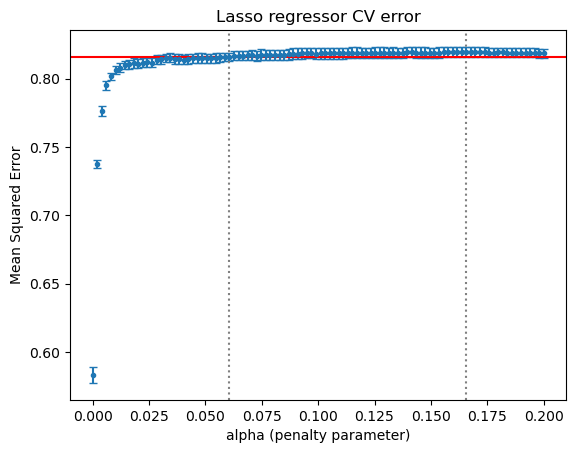

In [68]:
# plt.figure(figsize=(7,6))
plt.errorbar(x=C_values, y=mean_scores, yerr=std_scores, fmt='.', capsize=3)

plt.axvline(x=max_C_lasso, ls='dotted', color="grey")  # vertical line at the k yielding minimum CV MSE
plt.axvline(x=one_std_rule_C_lasso, ls='dotted', color="grey")   # vertical line at best k value according to 1 std err rule
plt.axhline(y=threshold_lasso, color="red")  # horizontal line line at best k value according to 1 std err rule

plt.title("Lasso regressor CV error")
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Mean Squared Error')
plt.show()

In [69]:
y_valid_pred = lassoCV.predict(X_valid)
accuracy_score(y_valid_pred, y_valid)

0.8071481757259866

In [70]:
lasso_grid = np.linspace(start=0.0001, stop=0.2, num=100)

coefs_ = []
for C in lasso_grid:
    lasso_pipe.set_params(lasso_log__C=C)
    lasso_pipe.fit(X=X_train, y=y_train)
    coefs_.append(lasso_pipe.named_steps['lasso_log'].coef_.ravel().copy())

coefs_ = np.array(coefs_)

In [71]:
#pd.DataFrame(coefs_).to_csv('lasso.csv')

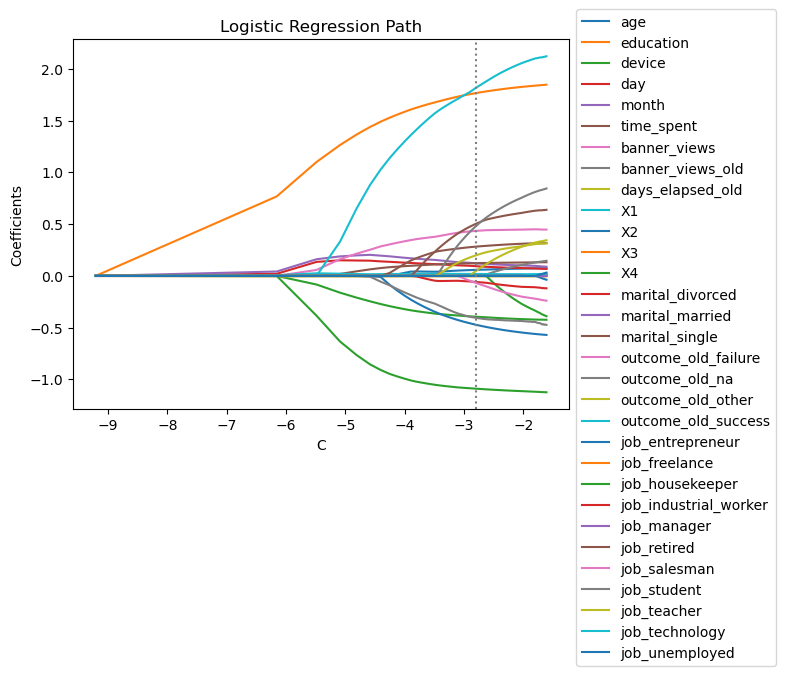

In [72]:
plt.plot(np.log(lasso_grid), coefs_, label=X_train.columns)
ymin, ymax = plt.ylim()
plt.axvline(x=np.log(one_std_rule_C_lasso), ls='dotted', color="grey")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.1))
plt.xlabel("C")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

In [73]:
lasso_pipe = Pipeline([
    ('std_num', std_num),
    ('lasso_log', LogisticRegression(penalty='l1', solver='liblinear', C=one_std_rule_C_lasso, fit_intercept=True, class_weight='balanced'))
])

In [74]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('std_num',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_num', StandardScaler(),
                                                  ['age', 'time_spent',
                                                   'banner_views',
                                                   'banner_views_old',
                                                   'days_elapsed_old',
                                                   'X4'])])),
                ('lasso_log',
                 LogisticRegression(C=0.06067575757575758,
                                    class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [75]:
print(accuracy_score(y_pred=lasso_pipe.predict(X_train), y_true=y_train))
print(accuracy_score(y_pred=lasso_pipe.predict(X_valid), y_true=y_valid))
print(accuracy_score(y_pred=lasso_pipe.predict(X_test), y_true=y_test))

0.8196616661346952
0.8056589724497394
0.8198064035740878


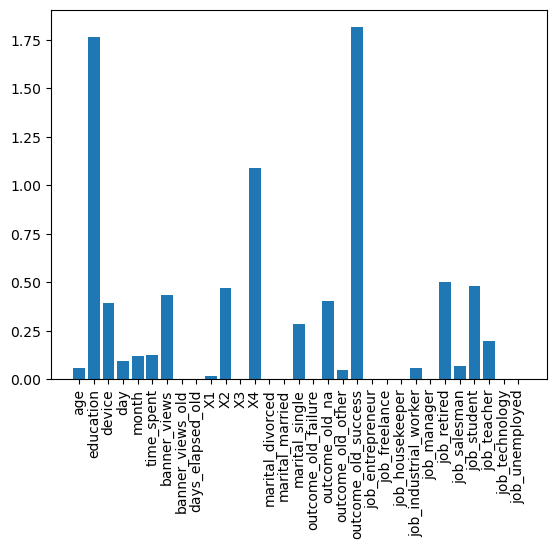

In [76]:
lasso_coefs = lasso_pipe.named_steps['lasso_log'].coef_
lasso_coefs = lasso_coefs.ravel()

lasso_coefs = pd.DataFrame({'col_names': X_train.columns, 'coef': lasso_coefs})
plt.bar(lasso_coefs['col_names'], np.abs(lasso_coefs['coef']))
plt.xticks(rotation = 90)
plt.show()

In [86]:
cols_lasso = ['banner_views_old', 'days_elapsed_old', 'X3', 'marital_divorced', 'job_entrepreneur', 'job_freelance',
             'job_housekeeper', 'job_technology', 'job_unemployed']

num_vars = ['age', 'time_spent', 'banner_views', 'X4']
std_num = ColumnTransformer(transformers=[('std_num', StandardScaler(), num_vars)],
                            remainder='passthrough')

X_train_reduced = X_train.drop(columns=cols_lasso)

lasso_pipe = Pipeline([
    ('std_num', std_num),
    ('lasso_log', LogisticRegression(solver='liblinear', fit_intercept=True, class_weight='balanced'))
])

lasso_pipe.fit(X_train_reduced, y_train)

Pipeline(steps=[('std_num',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_num', StandardScaler(),
                                                  ['age', 'time_spent',
                                                   'banner_views', 'X4'])])),
                ('lasso_log',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [87]:
print(accuracy_score(y_pred=lasso_pipe.predict(X_train_reduced), y_true=y_train))

0.8037025215448452
